## 1. 로지스틱 회귀(Logistic Regression) 개요
* 로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘이다.
* 로지스틱 회귀가 선형 회귀와 다른 점은 선형 함수의 회귀 최적선을 찾는 것이 아니라, 시그모이드(Sigmoid) 함수의 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다.

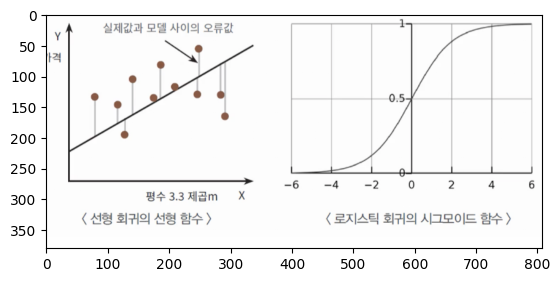

In [1]:
import matplotlib.image as img
import matplotlib.pyplot as pp

fileName = "./sample/12.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)
pp.show()

## 2. 로지스틱 회귀 예측
* 로지스틱 회귀는 주로 이진 분류(0과1)에 사용된다(물론 다중 클래스 분류에도 적용 가능).
* 로지스틱 회귀에서 예측 값은 예측 확률을 의미하며, 예측 값 예측 확률이 0.5 이상이면 1로, 0.5 이하이면 0으로 예측한다.
* 로지스틱 회귀의 예측 확률은 시그모이드 함수의 출력값으로 계산된다.


* 로지스틱 회귀는 가볍고, 빠르며, 이진 분류 예측 성능도 뛰어나다. 특히 희소한 데이터 세트 분류에서 성능이 좋아서 텍스트 분류에 자주 사용된다. 

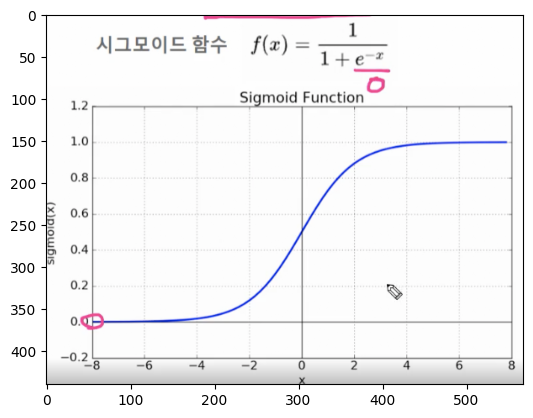

In [8]:
fileName = "./sample/13.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)
pp.show() 
# 시그모이드 함수에서 x가 커지면, e^-x가 0에 가까워지면서 나중에는 0으로 되고 f(x)=1이 된다.
# 시그모이드 함수에서 x가 0이 되면, e^-x가 1이 되어 f(x)=0.5가 된다.
# 시그모이드 함수에서 x가 -로 커지면, e^-x가 무한대로 가면서 나중에는 f(x)=0이 된다.

### 단순 선형 회귀 : y = w1x + w0 가 있다고 할 때
* 로지스틱 회귀는 0과 1을 예측하기에 단순 회귀식을 적용할 수 없다.
* 하지만 Odds(성공확률/실패확률)을 통해 선형 회귀식에 확률을 적용한다.
    * Odds(p) = p/(1-(p))
* 하지만 확률 p의 범위가 0 부터 1 사이이고, 선형 회귀의 반환값인 -무한대 부터 +무한대 값에 대응하기 위해서 로그 변환을 수행하고 아래와 같이 선형회귀를 적용한다.
    * Log(Odds(p)) = w1x + w0
* 해당 식을 데이터 값 x의 확률 p로 정리하면 아래와 같다. 


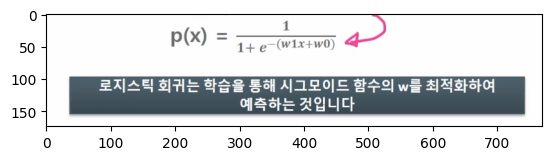

In [9]:
fileName = "./sample/14.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)

## 3. 사이킷런 로지스틱 회귀
* 사이킷런은 로지스틱 회귀를 LogisticRegression 클래스로 구현한다.
* LogisticRegression의 주요 하이퍼 파라미터로 penalty, C, solver가 있음.
    * Penalty: 규제 유형을 설정하며 'l2'로 설정시 L2 규제, 'l1'으로 설정시 L1 규제 적용.
    * C: 규제 강도를 조절하는 alpha값의 역수. 즉, C=1/alpha. C 값이 작을 수록 규제 강도가 크다. 
    * solver: 회귀 계수 최적화를 위한 다양한 최적화 방식이다.

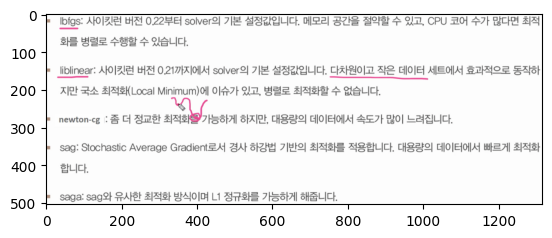

In [11]:
fileName = "./sample/15.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)
# LogisticRegression의 solver 유형

### 로지스틱 회귀 - 위스콘신 데이터 사용

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)


In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
# solver인자값을 생성자로 입력하지 않으면 solver='lbfgs'  
lr_clf = LogisticRegression() # solver='lbfgs'
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds),
                                                 roc_auc_score(y_test , lr_preds)))

accuracy: 0.977, roc_auc:0.972


In [15]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
# 여러개의 solver값 별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)

    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver, 
                                                                  accuracy_score(y_test, lr_preds),
                                                                  roc_auc_score(y_test , lr_preds)))                              


solver:lbfgs, accuracy: 0.977, roc_auc:0.972
solver:liblinear, accuracy: 0.982, roc_auc:0.979
solver:newton-cg, accuracy: 0.977, roc_auc:0.972
solver:sag, accuracy: 0.982, roc_auc:0.979
solver:saga, accuracy: 0.982, roc_auc:0.979


In [16]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))


최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", l

## 4. 회귀 트리 개요
* 사이킷런의 결정 트리 및 결정 트리 기반의 앙상블 알고리즘은 분류 뿐만 아니라 회귀도 가능하다. 
* 이는 트리가 CART(Classification and Regression Tree)를 기반으로 만들어 졌기 때문이다. CART는 분류 뿐만 아니라 회귀도 가능한 트리 분할 알고리즘이다. 
* CART 회귀 트리는 분류와 유사하게 분할을 하며, 최종 분할이 완료된 후에 각 분할 영역에 있는 데이터 결정값들의 평균 값으로 학습/예측한다.

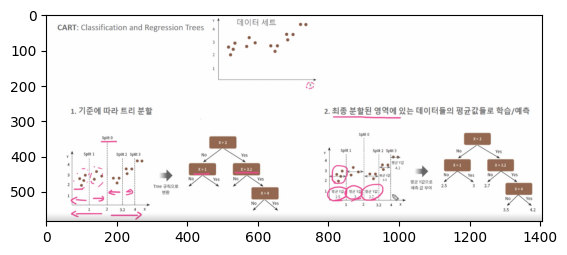

In [17]:
fileName = "./sample/16.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)
# CART

### (1) 사이킷런의 회귀 트리 지원

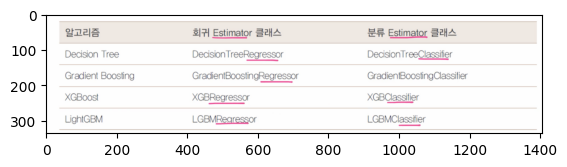

In [18]:
fileName = "./sample/17.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)


### (2) 회귀 트리의 오버 피팅
* 회귀 트리 역시 복잡한 트리 구조를 가질 경우 오버 피팅하기 쉬우므로 트리의 노드 개수의 제한 등의 방법을 통해 오버 피팅을 개선 할 수 있다.

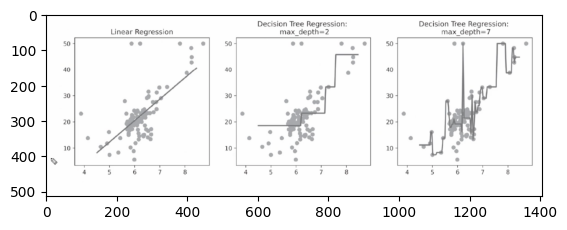

In [19]:
fileName = "./sample/18.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)


### 회귀 트리

In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


In [21]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.251 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


<AxesSubplot:>

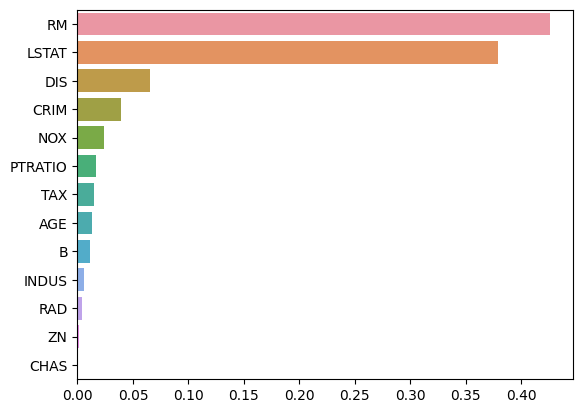

In [25]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

# 피처 중요도 뽑아봄
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


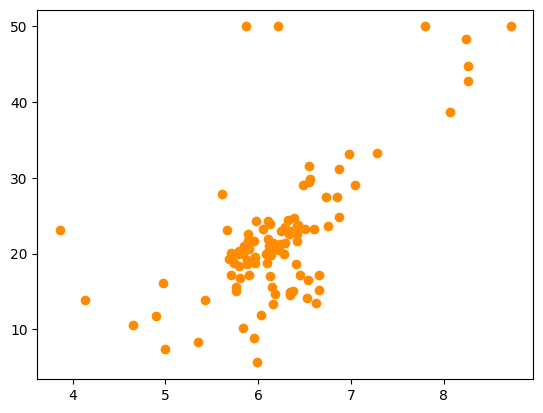

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

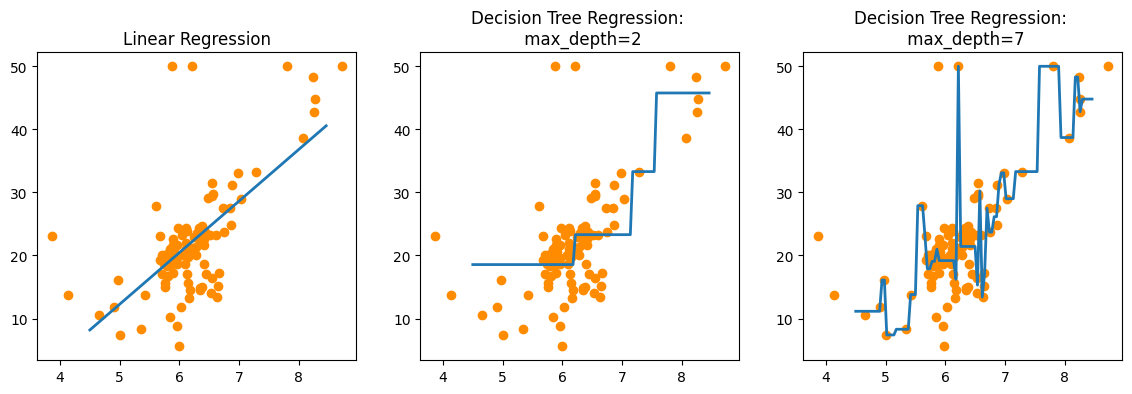

In [37]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)